## Earthquakes

In [1]:
# import required packages
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [19]:
# read in the earthquake data
raw_eqk = pd.read_csv('https://raw.githubusercontent.com/carmengg/eds220-hwk-1/main/data/earthquake_data.csv')

# explore the data
raw_eqk.head()

raw_eqk.columns

# raw_eqk.dtypes

# raw_eqk.shape

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'id', 'place', 'type'], dtype='object')

In [15]:
# select events that are earthquakes
raw_eqk.type.unique()

# create a new dataframe
eqk = raw_eqk[(raw_eqk.type == 'earthquake') & (raw_eqk.mag >= 6.5)]

eqk.shape

(54, 8)

<AxesSubplot:>

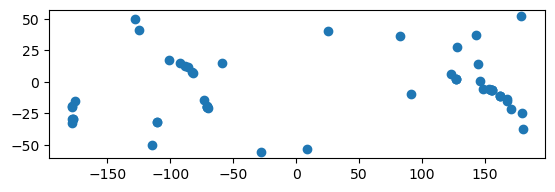

In [23]:
# turn the data frame into a geodataframe using the lat and long columns from the dataframe
eqk = gpd.GeoDataFrame(data = eqk,
                       geometry = gpd.points_from_xy(eqk.longitude, eqk.latitude),
                      crs = 4326)

# plot the new geodataframe
eqk.plot()

In [25]:
# import natural earth's low resolution countries polygons
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# check the crs
worldmap.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

[Text(0.5, 1.0, 'Earthquakes of Mag greater than 6.5 in 2014')]

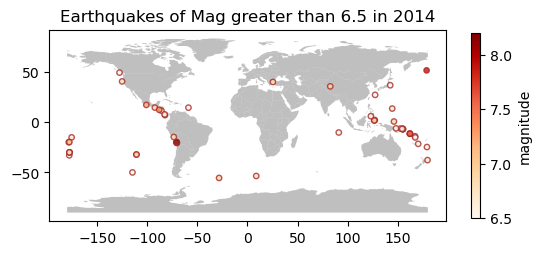

In [51]:
# plot earthquakes on countries
fig, ax = plt.subplots()

worldmap.plot(ax = ax,
             color = 'grey',
             alpha = .5)

eqk.plot(ax = ax,
        column = 'mag',
        cmap = 'OrRd',
        legend = True,
        markersize = 15,
        alpha = .8,
        edgecolor = 'brown',
        legend_kwds = {'shrink':.5,
                      'label':'magnitude'})

ax.set(title = 'Earthquakes of Mag greater than 6.5 in 2014')